In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Faraday Rotation 03_09.xlsx"
df = pd.read_excel(file_path)


In [39]:
# Params
N =2508
L=0.15 #m
n= N/L # turns/m
l = 0.1 #m, length of glass rod

#Constants
permit=4*np.pi*1e-7



# Green

In [40]:
# Green light 
lam=543e-9

theta = df.iloc[:, 13]  # rads
I = df.iloc[:, 8]  # A
# Remove NaN values
mask = ~(theta.isna() | I.isna())
theta, I  = theta[mask], I[mask]

theta=theta[1:].astype(float)
I=I[1:].astype(float)

Bl=permit*n*I*l #Tm

x=Bl
y=theta

In [41]:
print(x)
print(y)

2    0.000000
3    0.001681
4    0.002942
5    0.004202
6    0.005463
7    0.006724
Name: Ref angle=147.4, dtype: float64
2    0.000000
3    0.048869
4    0.094248
5    0.122173
6    0.157080
7    0.188496
Name: Unnamed: 13, dtype: float64



[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     994.9
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           6.02e-06
Time:                        10:44:50   Log-Likelihood:                 24.586
No. Observations:                   6   AIC:                            -45.17
Df Residuals:                       4   BIC:                            -45.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


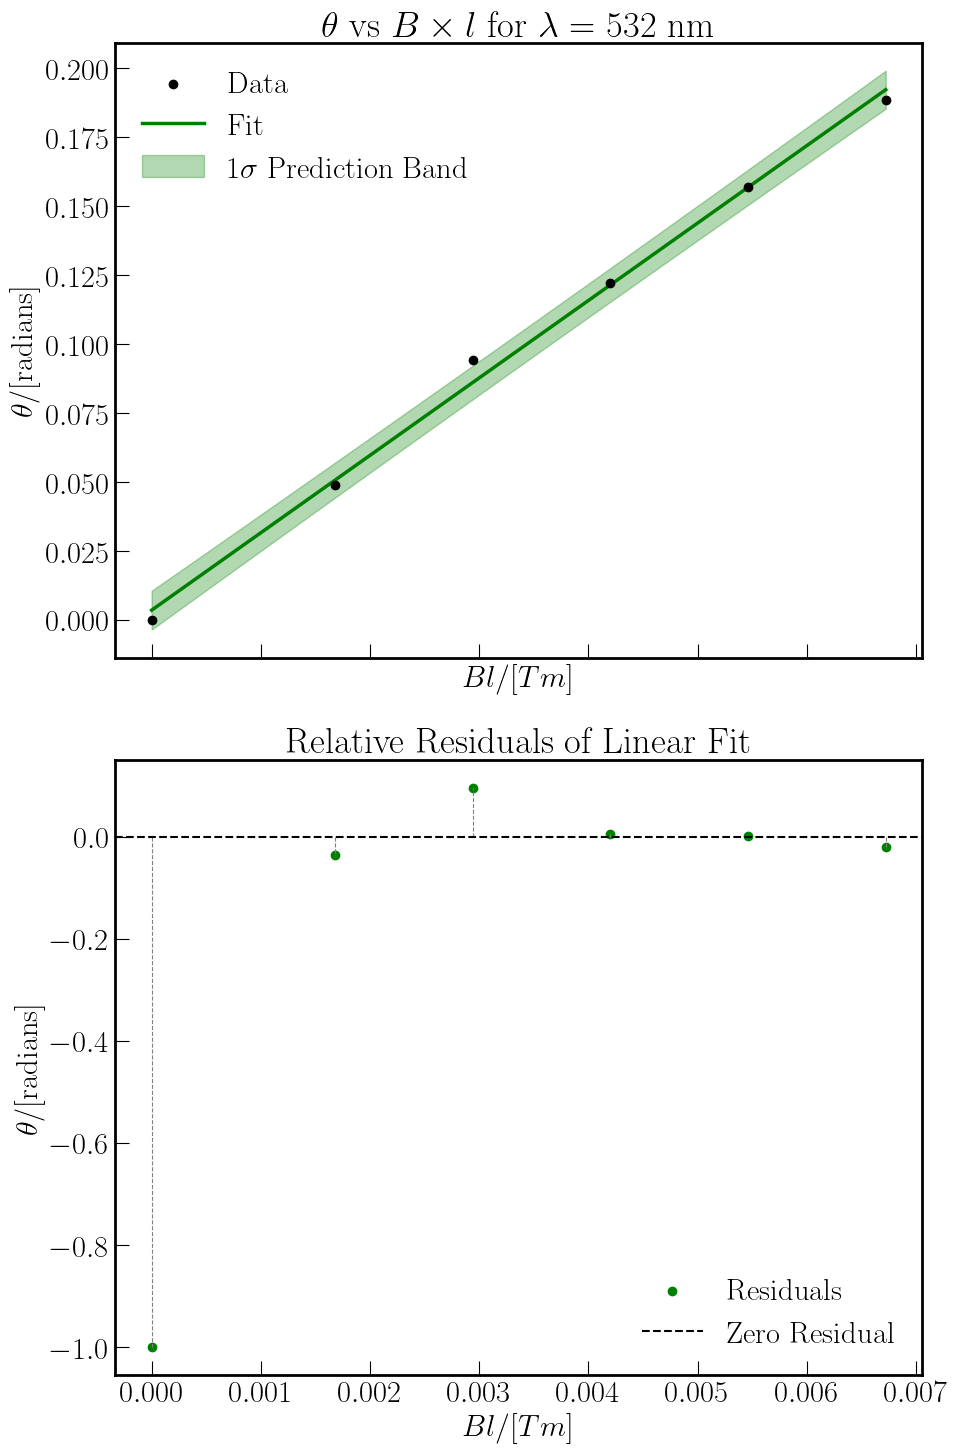

In [42]:
# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(10,15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="green", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="green", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$Bl/[Tm]$")
axs[0].set_ylabel(r"$\theta$/[radians]")
axs[0].set_title(r"$\theta$ vs $B\times l$ for $\lambda=532$ nm")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$Bl/[Tm]$")
axs[1].set_ylabel(r"$\theta$/[radians]")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("Verdet.png", dpi=300)

plt.show()


# Red

In [43]:
# Green light 
lam=632.8e-9

theta = df.iloc[:, 5]  # rads
I = df.iloc[:, 0]  # A
# Remove NaN values
mask = ~(theta.isna() | I.isna())
theta, I  = theta[mask], I[mask]

theta=theta[1:].astype(float)
I=I[1:].astype(float)
Bl=permit*n*I*l #Tm

x= Bl
y=theta

In [44]:
print(x)
print(y)

1    0.000000
2    0.002942
3    0.004622
4    0.006303
Name: Ref angle=146, dtype: float64
1    0.000000
2    0.041888
3    0.073304
4    0.104720
Name: Unnamed: 5, dtype: float64



[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     356.4
Date:                Sat, 20 Sep 2025   Prob (F-statistic):            0.00279
Time:                        10:44:54   Log-Likelihood:                 17.705
No. Observations:                   4   AIC:                            -31.41
Df Residuals:                       2   BIC:                            -32.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


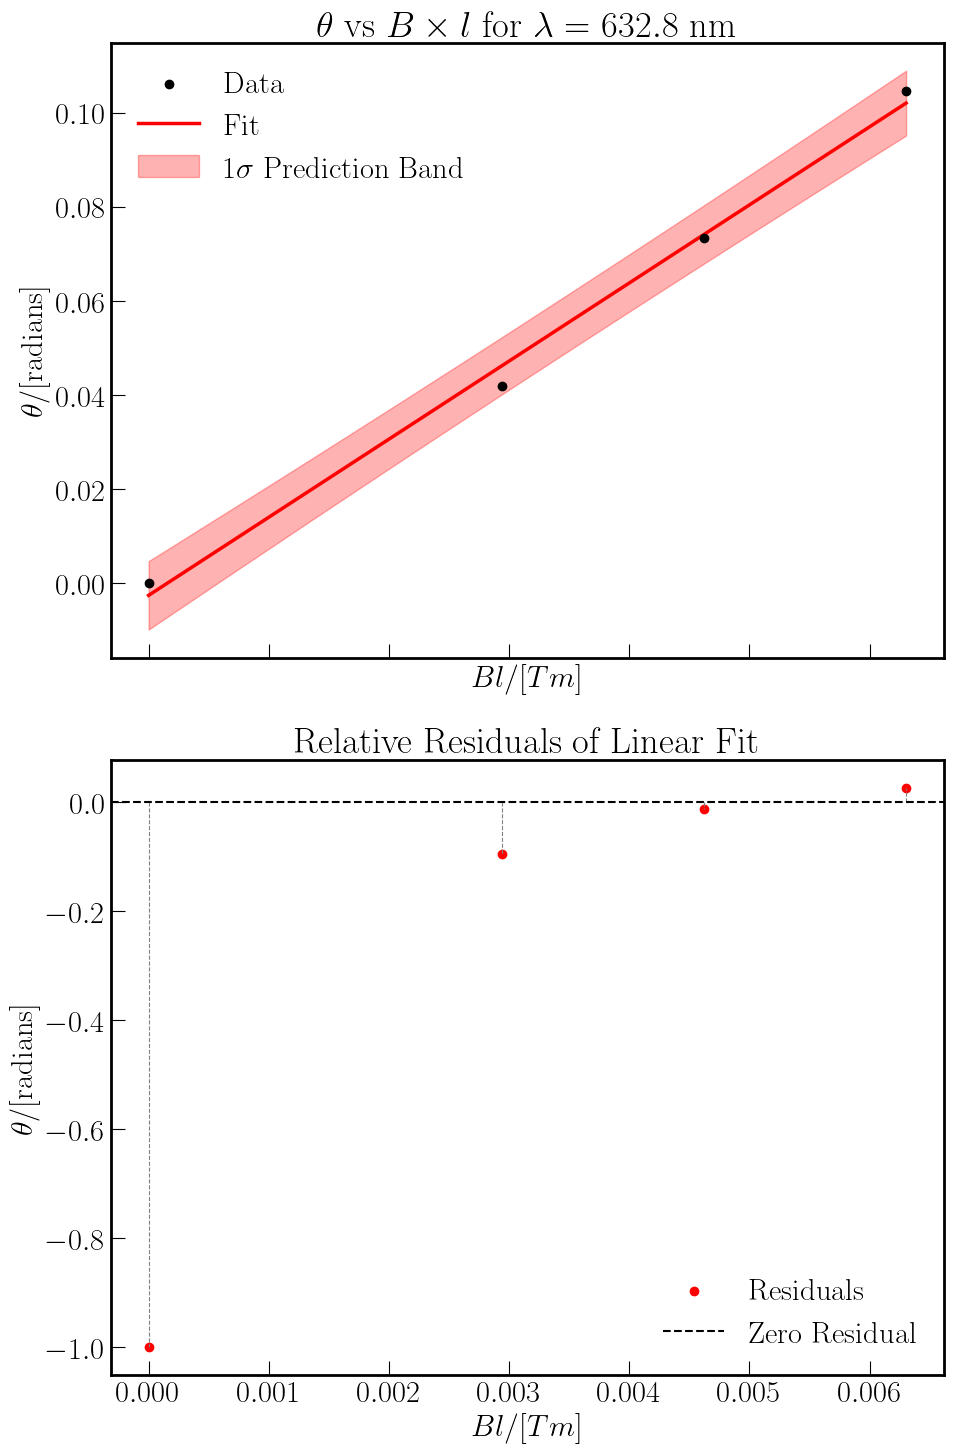

In [45]:
# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(10,15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="red", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="red", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$Bl/[Tm]$")
axs[0].set_ylabel(r"$\theta$/[radians]")
axs[0].set_title(r"$\theta$ vs $B\times l$ for $\lambda=632.8$ nm")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="red", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$Bl/[Tm]$")
axs[1].set_ylabel(r"$\theta$/[radians]")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("Verdetred.png", dpi=300)

plt.show()
